<a href="https://colab.research.google.com/github/gugugagago/dibimbing-materials/blob/main/PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('survey.csv')

In [7]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [8]:
df.shape

(1259, 27)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

# MISSING VALUES

*CHECKING MISSING VALUES*





In [10]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

## Handling missing values(drop, mode)

In [11]:
df.drop('comments', axis = 'columns', inplace = True)

In [12]:
df.drop('Timestamp', axis = 'columns', inplace = True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   state                      744 non-null    object
 4   self_employed              1241 non-null   object
 5   family_history             1259 non-null   object
 6   treatment                  1259 non-null   object
 7   work_interfere             995 non-null    object
 8   no_employees               1259 non-null   object
 9   remote_work                1259 non-null   object
 10  tech_company               1259 non-null   object
 11  benefits                   1259 non-null   object
 12  care_options               1259 non-null   object
 13  wellness_program           1259 non-null   object
 14  seek_hel

In [14]:
df_update = df.copy()
df_update['state'] = df_update['state'].fillna(df_update['state'].mode()[0])
df_update['self_employed'] = df_update['self_employed'].fillna(df_update['self_employed'].mode()[0])
df_update['work_interfere'] = df_update['work_interfere'].fillna(df_update['work_interfere'].mode()[0])

In [15]:
df_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   state                      1259 non-null   object
 4   self_employed              1259 non-null   object
 5   family_history             1259 non-null   object
 6   treatment                  1259 non-null   object
 7   work_interfere             1259 non-null   object
 8   no_employees               1259 non-null   object
 9   remote_work                1259 non-null   object
 10  tech_company               1259 non-null   object
 11  benefits                   1259 non-null   object
 12  care_options               1259 non-null   object
 13  wellness_program           1259 non-null   object
 14  seek_hel

In [16]:
df_update.isnull().sum()

Age                          0
Gender                       0
Country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

In [17]:
df_update.duplicated().sum()

4

In [18]:
df_update.drop_duplicates(inplace = True)

In [19]:
df_update.duplicated().sum()

0

## Normalized and Standardized

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_update[['Age']])

df_update['Normalized_Age'] = scaler.transform(df_update[['Age']])

In [21]:
df_update.describe()

,Age,Normalized_Age
count,1.255000e+03,1.255000e+03
mean,7.968131e+07,7.968303e-04
std,2.822787e+09,2.822787e-02
min,-1.726000e+03,0.000000e+00
25%,2.700000e+01,1.753000e-08
50%,3.100000e+01,1.757000e-08
75%,3.600000e+01,1.762000e-08
max,1.000000e+11,1.000000e+00


In [22]:
# Standardize Age using StandardScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_update[['Age']])

df_update['Standardized_Age'] = scaler.transform(df_update[['Age']])

In [23]:
df_update.describe()

,Age,Normalized_Age,Standardized_Age
count,1.255000e+03,1.255000e+03,1.255000e+03
mean,7.968131e+07,7.968303e-04,-1.415424e-17
std,2.822787e+09,2.822787e-02,1.000399e+00
min,-1.726000e+03,0.000000e+00,-2.823975e-02
25%,2.700000e+01,1.753000e-08,-2.823913e-02
50%,3.100000e+01,1.757000e-08,-2.823912e-02
75%,3.600000e+01,1.762000e-08,-2.823912e-02
max,1.000000e+11,1.000000e+00,3.541186e+01


In [24]:
temp_df = df_update[df_update['Age'] > 0]

In [25]:
temp_df['Log_Age'] = temp_df['Age'].transform(np.log)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [26]:
temp_df['Log_Age'].describe()

count    1252.000000
mean        3.460052
std         0.662845
min         1.609438
25%         3.295837
50%         3.433987
75%         3.583519
max        25.328436
Name: Log_Age, dtype: float64

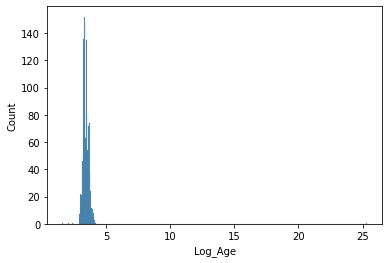

In [27]:
sns.histplot(temp_df['Log_Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


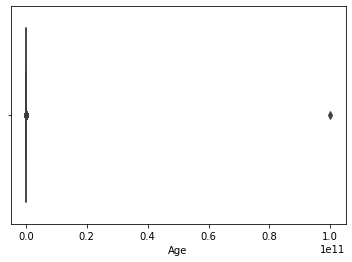

In [28]:
# Check outliers using boxplot
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(df['Age'])

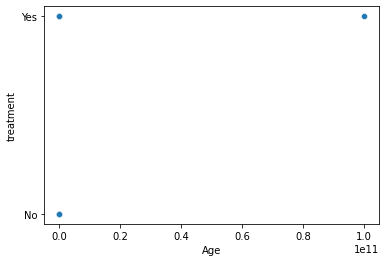

In [29]:
import seaborn as sns

sns.scatterplot(x = df_update['Age'],
                y = df_update['treatment'])

In [37]:
dff = df_update.join(pd.get_dummies(df_update['Gender'], prefix='Gender'))

In [38]:
dff.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,Gender_male,Gender_male leaning androgynous,Gender_msle,Gender_non-binary,"Gender_ostensibly male, unsure what that really means",Gender_p,Gender_queer,Gender_queer/she/they,Gender_something kinda male?,Gender_woman
0,37,Female,United States,IL,No,No,Yes,Often,6-25,No,...,0,0,0,0,0,0,0,0,0,0
1,44,M,United States,IN,No,No,No,Rarely,More than 1000,No,...,0,0,0,0,0,0,0,0,0,0
2,32,Male,Canada,CA,No,No,No,Rarely,6-25,No,...,0,0,0,0,0,0,0,0,0,0
3,31,Male,United Kingdom,CA,No,Yes,Yes,Often,26-100,No,...,0,0,0,0,0,0,0,0,0,0
4,31,Male,United States,TX,No,No,No,Never,100-500,Yes,...,0,0,0,0,0,0,0,0,0,0


In [48]:
dff['Gender']

0       Female
1            M
2         Male
3         Male
4         Male
         ...  
1254      male
1255      Male
1256      male
1257         f
1258      Male
Name: Gender, Length: 1255, dtype: object

In [52]:
treatment_count = dff.groupby(['treatment'],as_index=False).size()

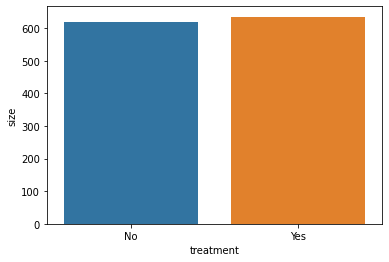

In [53]:
sns.barplot(x=treatment_count['treatment'],
            y=treatment_count['size'])

## Imbalanced Data

In [54]:
dff['self_employed'].value_counts()

No     1110
Yes     145
Name: self_employed, dtype: int64

In [55]:
df_new = dff.copy()

X = df_new.drop(['self_employed'], axis=1)
y = df_new['self_employed']

In [58]:
df_up = df_new.copy()
X = df_new.drop(['Gender'], axis=1)
y = df_new['Gender']

In [59]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("X_train dataset: ", X_train.shape)
print("y_train dataset: ", y_train.shape)
print("X_test dataset: ", X_test.shape)
print("y_test dataset: ", y_test.shape)

X_train dataset:  (1004, 75)
y_train dataset:  (1004,)
X_test dataset:  (251, 75)
y_test dataset:  (251,)


In [60]:
from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=8, random_state=8, splitter ='random')

# fit the model
clf_en.fit(X_train, y_train)
 
y_pred_en = clf_en.predict(X_test)

ValueError: ignored